# Case Study on Supervised Learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [299]:
# importing necessary libraries

In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.Read the dataset to the python environment
# importing the data

In [301]:
data = pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [302]:
data.isnull().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

2.Do necessary pre-processing steps.
# Preprocessing steps

In [303]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We need to deal with 20 null values. 7 in column 'SL' 6 in column 'SW' and 6 in column 'PL'
In SL and SW the deviation from the mean is comparatively less so we could replace the NaN values by the mean. 
And the null values in 'PL'by median.

In [304]:
from sklearn import preprocessing

In [305]:
data["SL"] = data["SL"].fillna(data["SL"].mean())
data["SW"] = data["SW"].fillna(data["SW"].mean())
data["PL"] = data["PL"].fillna(data["PL"].median())

In [306]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [307]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.780000,1.198667
std,0.808480,0.421884,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [308]:
# All null values are removed

Outliers

Text(0.5, 1.0, 'Box plot of SL')

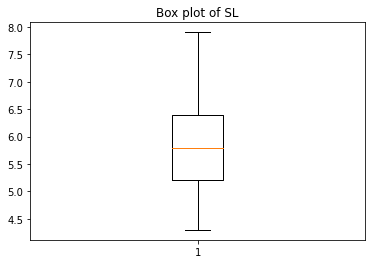

In [309]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

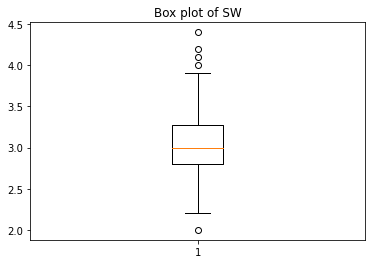

In [310]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

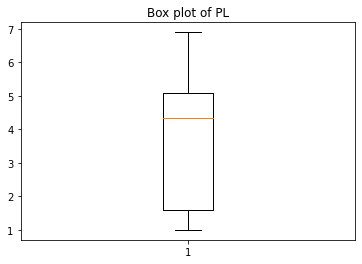

In [311]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

In [312]:
upper_limit = data['SW'].quantile(.98)
lower_limit = data['SW'].quantile(.02)
data = data[(data['SW'] < upper_limit) & (data['SW'] > lower_limit)]
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,Iris-setosa
1,4.900000,3.0,1.40,0.2,Iris-setosa
2,5.855944,3.2,1.30,0.2,Iris-setosa
3,4.600000,3.1,1.50,0.2,Iris-setosa
4,5.000000,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,Iris-virginica
146,6.300000,2.5,5.00,1.9,Iris-virginica
147,6.500000,3.0,4.35,2.0,Iris-virginica
148,6.200000,3.4,5.40,2.3,Iris-virginica


Text(0.5, 1.0, 'Box plot of SW')

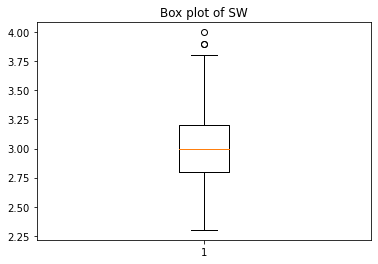

In [313]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

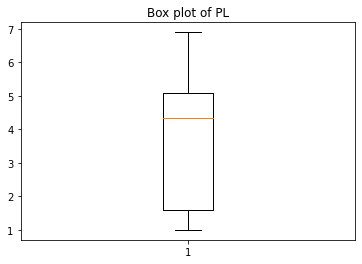

In [314]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

In [315]:
data.shape

(143, 5)

In [316]:
# Outliers are Managed

3. Find out which classification model gives the best result to predict iris
# Classification Models - - - Target column - 'Classification'

In [317]:
data['Classification'].value_counts()

Iris-virginica     49
Iris-setosa        47
Iris-versicolor    47
Name: Classification, dtype: int64

## Splitting Data set into test and train sets

In [318]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [319]:
# The targeted variable Classification is category data we need to convert it into nummerical values using label encoding 

In [320]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data

<ipython-input-320-02bcb871dc23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classification'] = le.fit_transform(data['Classification'])


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.855944,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,4.35,2.0,2
148,6.200000,3.4,5.40,2.3,2


In [321]:
data.tail(5)

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


In [322]:
#Model Training

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
y = data['Classification']
x = data.drop(['Classification'],axis =1)

In [325]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [326]:
x_train.shape

(107, 4)

In [327]:
y_test.shape

(36,)

# Classification Model 1
##Logistic Regression

In [328]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [329]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [330]:
print("Accuracy is:",accuracy_score(y_test,y_pred) )
print("Precision_score is:",precision_score(y_test,y_pred,pos_label='positive',average='micro') )
print("Recall_score:",recall_score(y_test,y_pred,pos_label='positive',average='micro') )
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy is: 0.9166666666666666
Precision_score is: 0.9166666666666666
Recall_score: 0.9166666666666666
f1_score is: 0.9166666666666666


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [331]:
y_test.value_counts()

0    13
2    12
1    11
Name: Classification, dtype: int64

In [332]:
#confusion matrix

In [333]:
confusion_matrix(y_test,y_pred)

array([[12,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]], dtype=int64)

## Classification Model 2
#2. KNN classifier

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()

In [335]:
knnmodel.fit(x_train,y_train)
#y_pred = logit_model.predict(x_test)

KNeighborsClassifier()

In [336]:
y_pred = knnmodel.predict(x_test)

In [337]:
print("Acuuracy is:",knnmodel.score(x_test,y_pred))

Acuuracy is: 1.0


## Classification Model 3
#3. Decision Tree Classifier

In [338]:
from sklearn.tree import DecisionTreeClassifier

In [339]:
dtmodel = DecisionTreeClassifier()

In [340]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [341]:
y_pred = dtmodel.predict(x_test)

In [342]:
print("Accuracy is:",dtmodel.score(x_test,y_pred))

Accuracy is: 1.0


In [343]:
y_test.value_counts()

0    13
2    12
1    11
Name: Classification, dtype: int64

In [344]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]], dtype=int64)

## Classification Model 4
#4.SVM

In [345]:
from sklearn.svm import SVC

In [346]:
svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)


In [347]:
print("Accuracy using linear svm is:",accuracy_score(y_test,y_pred))

Accuracy using linear svm is: 0.9444444444444444


## Classification Model 5
#5.Random forest algorithm

In [348]:
from sklearn.ensemble import RandomForestClassifier

In [349]:
rf = RandomForestClassifier()

In [350]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [351]:
# To check the accuracy of the model

In [352]:
from sklearn.metrics import f1_score,confusion_matrix
print("The f1 score is:", f1_score(y_test,y_pred,pos_label='positive',average='micro'))
print("The confusion matrix is:",confusion_matrix(y_test,y_pred))

The f1 score is: 0.9444444444444444
The confusion matrix is: [[13  0  0]
 [ 0 10  1]
 [ 0  1 11]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [353]:
# Result: Among all the classifiers the decision tree classifier shows predicts the model more accurately with accuract rate of 100% 